<a href="https://colab.research.google.com/github/internship-kaard/zenteiq-kaard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a machine learning model that can predict student dropout rates or academic success based on a variety of factors, such as attendance, grades, and demographic data. The model should be able to identify students who are at risk of dropping out or falling behind and provide targeted interventions and support.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.isna().sum()

In [24]:
print(df.shape)

(4424, 35)


In [25]:
print(df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [27]:
from pandas.io.formats.format import set_option
set_option('display.width', 100)
set_option('display.precision',2)
print(df.describe())

       Marital status  Application mode  Application order   Course  Daytime/evening attendance  \
count         4424.00           4424.00            4424.00  4424.00                     4424.00   
mean             1.18              6.89               1.73     9.90                        0.89   
std              0.61              5.30               1.31     4.33                        0.31   
min              1.00              1.00               0.00     1.00                        0.00   
25%              1.00              1.00               1.00     6.00                        1.00   
50%              1.00              8.00               1.00    10.00                        1.00   
75%              1.00             12.00               2.00    13.00                        1.00   
max              6.00             18.00               9.00    17.00                        1.00   

       Previous qualification  Nacionality  Mother's qualification  Father's qualification  \
count         

In [ ]:
correlations = df.corr(method='pearson')
print(correlations)

In [30]:
print(df.skew())

Marital status                                    4.40
Application mode                                  0.12
Application order                                 1.88
Course                                           -0.19
Daytime/evening attendance                       -2.51
Previous qualification                            2.41
Nacionality                                       7.28
Mother's qualification                           -0.10
Father's qualification                           -0.29
Mother's occupation                               2.23
Father's occupation                               4.06
Displaced                                        -0.19
Educational special needs                         9.15
Debtor                                            2.43
Tuition fees up to date                          -2.35
Gender                                            0.62
Scholarship holder                                1.16
Age at enrollment                                 2.05
Internatio

<ipython-input-30-b9bdaf19c078>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


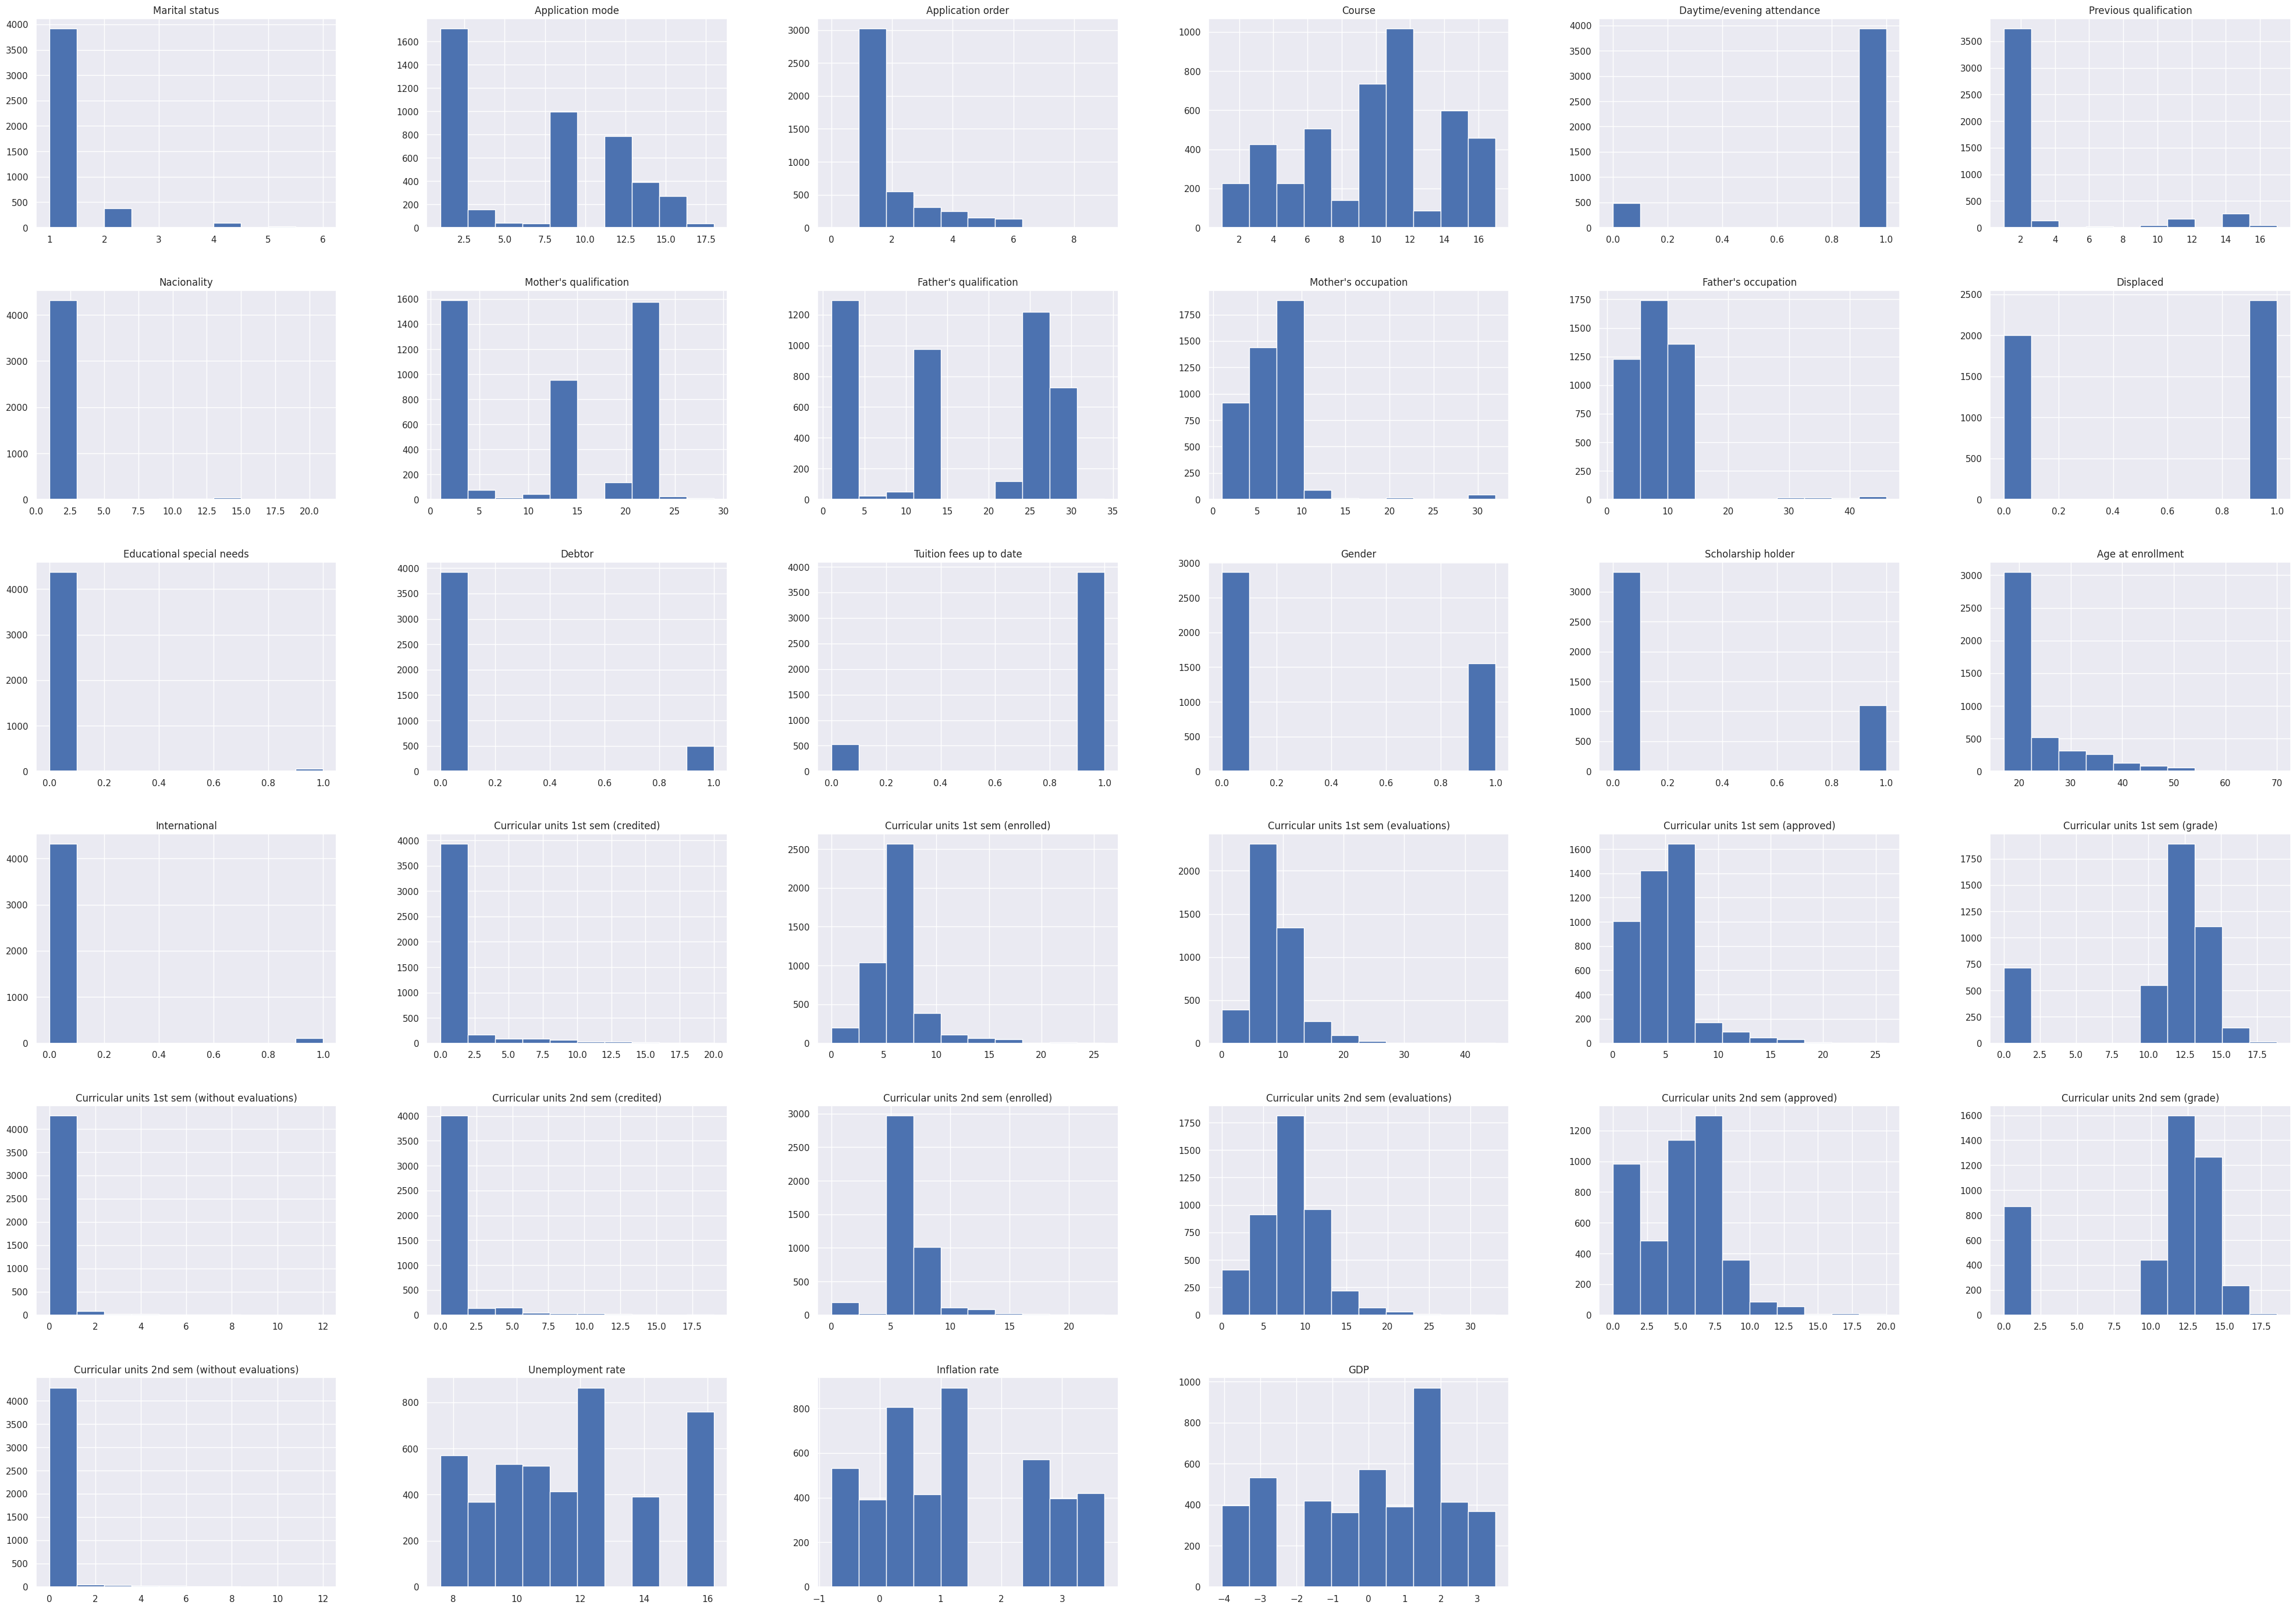

In [34]:
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(50, 35), grid=True, legend=None);